# Przygotowanie danych do modelowania wpływu trybu życia na poziom zarobków

#### Rafał Kaczmarek, 14.02.2021

## Wstęp

Celem projektu jest przygotowanie danych do wykorzystania ich podczas tworzenia modelu. Projekt składa się z dwóch części. Pierwsza z nich dotyczy przygotowania zbioru danych. Zostaną wybrane odpowiednie kolumny z poszczególnych zbiorów i utworzony jeden zbioru z tych kolumn. W drugiej części przedstawiony zostanie proces oczyszczania danych, tak aby były one jak najlepiej przygotowane do wykorzystania w zamierzonym celu. Model, w którym będą wykorzystane te dane, zostanie przedstawiony w pracy zaliczeniowej na przedmiot Applied Microeconomics. Tematem przewodnim tej pracy jest analiza wpływu trybu życia na zarobki ze szczególnym uwzględnieniem kwestii zdrowego trybu życia.

Dane wykorzystane w tym projekcie pochodzą ze strony https://wwwn.cdc.gov/  a zostały stworzone przez The National Health and Nutrition Examination Surveys (NHANES). Zawierają one informacje na podstawie ankiet przeprowadzonych w latach 2017-2018 na terenie Stanów Zjednoczonych. Na wspomnianej wcześniej stronie dostępnych jest wiele zbiorów, ale do modelu wyselekcjonowałem 5 zbiorów danych na podstawie których wybiorę zmienne w celu zbadania wpływu różnych czynników na zarobki*. Te zbiory to:

-Demographics data - zawiera dane demograficzne.

-Current health status - zawiera informacje na temat ogólnego stanu zdrowia

-The Diet Behavior and Nutrition - zawiera informacje na temat nawyków żywieniowych oraz kwestii dotyczących odżywiania.

-Physical Activity - zawiera informacje na temat aktywności fizycznej

-Physical Functioning - zawiera informacje na temat zdrowia psychicznego.

Ze wszystkimi zbiorami wstępnie zapoznałem się przy użyciu środowiska SAS, ponieważ pobierane dane są w formacie charakterystycznym dla SASa, więc importowanie do Jupytera każdego zbioru w celu wyselekcjonowania odpowiednich zmiennych byłoby niepotrzebnym działaniem, tym bardziej że według mnie wyświetlony pełny zbiór jest zdecydowanie lepiej widoczny w SASie niż w Jupyterze, co pozwala na lepsze i przyjemniejsze zapoznanie się z danymi oraz selekcję odpowiednich kolumn. W związku z tym przedstawiona wstępna analiza danych będzie znacznie skrócona a nacisk zostanie położony na obróbkę danych.


*W całej pracy słowo "zbiór" jest używane w kontekście ogólnego wyrazu określającego zbiór danych a nie w konteksćie typu obiektu w pythonie.

## Przygotowanie zbioru danych

In [1]:
import pandas as pd
import numpy as np

In [2]:
demographics=pd.read_sas("...\demographics.XPT")
display(demographics)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,10.0,2.0,2.0,70.0,NaN,5.0,6.0,2.0,NaN,...,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,4.0,4.0,0.95
9250,102953.0,10.0,2.0,1.0,42.0,NaN,1.0,1.0,2.0,NaN,...,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,12.0,12.0,NaN
9251,102954.0,10.0,2.0,2.0,41.0,NaN,4.0,4.0,1.0,NaN,...,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,10.0,10.0,1.18
9252,102955.0,10.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,175.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1.0,136.0,9.0,9.0,2.24


Wyświetlam zbiór demographics, który zawiera dane demograficzne wykorzystane w badaniu. Dane przy użyciu powyższej funkcji nie zostały zaczytane poprawnie, co jest szczególnie widocznie w nazwach kolumn. Znalazłem informacje na temat jak poprawnie używać pliki od NHANES (link: http://dept.stat.lsa.umich.edu/~kshedden/Python-Workshop/nhanes_data.html ) ale na pierwszy rzut oka nie jest to łatwe do poprawnego wykorzystania a dodatkowo wydaje się być czasochłonne, dlatego z racji iż posiadam SASa to przy jego użyciu zmienie te pliki na format, z którym python sobie bez problemu poradzi. Będzie to rozwiązanie zdecydowanie szybsze a zarazem bezpieczniejsze w kwestii uniknięcia niepotrzebnych błędów w danych wynikajacych ze złego ich zaczytania.

In [3]:
demographics=pd.read_excel("...\demographics_xls.xls")
display(demographics)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Respondent sequence number,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six month time period,Age in months at exam - 0 to 19 years,...,HH ref person's education level,HH ref person's marital status,HH ref person's spouse's education level,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Annual household income,Annual family income,Ratio of family income to poverty
0,93703,10,2,2,2,NaN,5,6,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2,145,15.0,15.0,5.00
1,93704,10,2,1,2,NaN,3,3,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1,143,15.0,15.0,5.00
2,93705,10,2,2,66,NaN,4,4,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2,145,3.0,3.0,0.82
3,93706,10,2,1,18,NaN,5,6,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2,134,NaN,NaN,NaN
4,93707,10,2,1,13,NaN,5,7,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1,138,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952,10,2,2,70,NaN,5,6,2.0,NaN,...,2.0,1.0,1.0,16896.276203,18338.711104,2,138,4.0,4.0,0.95
9250,102953,10,2,1,42,NaN,1,1,2.0,NaN,...,2.0,2.0,NaN,61630.380013,63661.951573,2,137,12.0,12.0,NaN
9251,102954,10,2,2,41,NaN,4,4,1.0,NaN,...,2.0,2.0,NaN,17160.895269,17694.783346,1,144,10.0,10.0,1.18
9252,102955,10,2,2,14,NaN,4,4,2.0,175.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1,136,9.0,9.0,2.24


Wygląda to zdecydowanie lepiej. Sprawdzę jeszcze nazwy wszystkich kolumn oraz wyświetlę więcej danych aby dokładniej zweryfikować czy powstały nieoczekiwane błędy.

In [4]:
demographics.columns

Index(['Respondent sequence number', 'Data release cycle',
       'Interview/Examination status', 'Gender', 'Age in years at screening',
       'Age in months at screening - 0 to 24 mos', 'Race/Hispanic origin',
       'Race/Hispanic origin w/ NH Asian', 'Six month time period',
       'Age in months at exam - 0 to 19 years',
       'Served active duty in US Armed Forces', 'Served in a foreign country',
       'Country of birth', 'Citizenship status', 'Length of time in US',
       'Education level - Children/Youth 6-19', 'Education level - Adults 20+',
       'Marital status', 'Pregnancy status at exam',
       'Language of SP Interview', 'Proxy used in SP Interview?',
       'Interpreter used in SP Interview?', 'Language of Family Interview',
       'Proxy used in Family Interview?',
       'Interpreter used in Family Interview?', 'Language of MEC Interview',
       'Proxy used in MEC Interview?', 'Interpreter used in MEC Interview?',
       'Language of ACASI Interview',
       'Tot

In [5]:
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
display(demographics)

,Respondent sequence number,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six month time period,Age in months at exam - 0 to 19 years,Served active duty in US Armed Forces,Served in a foreign country,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Marital status,Pregnancy status at exam,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,Language of ACASI Interview,Total number of people in the Household,Total number of people in the Family,. of children 5 years or younger in HH,. of children 6-17 years old in HH,. of adults 60 years or older in HH,HH ref person's gender,HH ref person's age in years,HH ref person's education level,HH ref person's marital status,HH ref person's spouse's education level,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Annual household income,Annual family income,Ratio of family income to poverty
0,93703,10,2,2,2,NaN,5,6,2.0,27.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,3,0,0,1,2,3.0,1.0,3.0,9246.491865,8539.731348,2,145,15.0,15.0,5.00
1,93704,10,2,1,2,NaN,3,3,1.0,33.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,2,0,0,1,2,3.0,1.0,2.0,37338.768343,42566.614750,1,143,15.0,15.0,5.00
2,93705,10,2,2,66,NaN,4,4,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,2.0,3.0,NaN,1,2,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1,1,0,0,1,2,4,1.0,2.0,NaN,8614.571172,8338.419786,2,145,3.0,3.0,0.82
3,93706,10,2,1,18,NaN,5,6,2.0,222.0,2.0,NaN,1,1.0,NaN,15.0,NaN,NaN,NaN,1,2,2,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5,5,0,0,1,1,4,3.0,1.0,2.0,8548.632619,8723.439814,2,134,NaN,NaN,NaN
4,93707,10,2,1,13,NaN,5,7,2.0,158.0,NaN,NaN,1,1.0,NaN,6.0,NaN,NaN,NaN,1,1,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7,7,0,3,0,1,3,2.0,1.0,3.0,6769.344567,7064.609730,1,138,10.0,10.0,1.88
5,93708,10,2,2,66,NaN,5,6,2.0,NaN,2.0,NaN,2,1.0,7.0,NaN,1.0,1.0,NaN,1,2,1,1.0,2.0,2.0,1.0,2.0,1.0,3.0,2,2,0,0,2,1,4,1.0,1.0,1.0,13329.450589,14372.488765,2,138,6.0,6.0,1.63
6,93709,10,2,2,75,NaN,4,4,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,4.0,2.0,NaN,1,2,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1,1,0,0,1,2,4,2.0,2.0,NaN,12043.388271,12277.556662,1,136,2.0,2.0,0.41
7,93710,10,2,2,0,11.0,3,3,2.0,13.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,1,0,0,1,2,3.0,1.0,3.0,16418.298416,16848.020117,1,134,15.0,15.0,4.90
8,93711,10,2,1,56,NaN,5,6,2.0,NaN,2.0,NaN,2,1.0,6.0,NaN,5.0,1.0,NaN,1,2,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,0,1,3,3.0,1.0,3.0,11178.260106,12390.919724,2,134,15.0,15.0,5.00
9,93712,10,2,1,18,NaN,1,1,2.0,227.0,2.0,NaN,2,2.0,5.0,12.0,NaN,NaN,NaN,1,2,2,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,2,3,1.0,2.0,NaN,29040.496558,30336.654325,2,147,4.0,4.0,0.76


In [6]:
demographics.size

425684

In [7]:
demographics.dtypes

Respondent sequence number                    int64
Data release cycle                            int64
Interview/Examination status                  int64
Gender                                        int64
Age in years at screening                     int64
Age in months at screening - 0 to 24 mos    float64
Race/Hispanic origin                          int64
Race/Hispanic origin w/ NH Asian              int64
Six month time period                       float64
Age in months at exam - 0 to 19 years       float64
Served active duty in US Armed Forces       float64
Served in a foreign country                 float64
Country of birth                              int64
Citizenship status                          float64
Length of time in US                        float64
Education level - Children/Youth 6-19       float64
Education level - Adults 20+                float64
Marital status                              float64
Pregnancy status at exam                    float64
Language of 

In [8]:
demographics.describe()

,Respondent sequence number,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six month time period,Age in months at exam - 0 to 19 years,Served active duty in US Armed Forces,Served in a foreign country,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Marital status,Pregnancy status at exam,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,Language of ACASI Interview,Total number of people in the Household,Total number of people in the Family,. of children 5 years or younger in HH,. of children 6-17 years old in HH,. of adults 60 years or older in HH,HH ref person's gender,HH ref person's age in years,HH ref person's education level,HH ref person's marital status,HH ref person's spouse's education level,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Annual household income,Annual family income,Ratio of family income to poverty
count,9254.000000,9254.0,9254.000000,9254.000000,9254.000000,597.000000,9254.000000,9254.000000,8704.000000,3433.000000,6004.000000,561.000000,9254.000000,9251.000000,1948.000000,2306.000000,5569.000000,5569.000000,1110.000000,9254.000000,9254.000000,9254.000000,8780.000000,8780.000000,8780.000000,6684.000000,6684.000000,6684.000000,4977.000000,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000,8764.000000,9063.000000,4751.000000,9254.000000,9254.000000,9254.000000,9254.000000,8763.000000,8780.000000,8023.000000
mean,98329.500000,10.0,1.940566,1.507564,34.334234,10.437186,3.233953,3.497190,1.517348,107.475677,1.909394,1.484848,1.237519,1.118582,9.283881,6.349523,3.525768,2.688813,2.030631,1.103631,1.655608,1.968770,1.095558,1.998064,1.972779,1.072113,1.992519,1.978157,1.125779,3.717419,3.592609,0.498163,0.878647,0.490707,1.499784,2.860061,2.050776,1.472691,2.110714,34670.706829,34670.706829,1.517614,140.965853,12.500057,12.202506,2.375490
std,2671.544029,0.0,0.236448,0.499970,25.500280,7.092970,1.277650,1.700961,0.499728,70.618237,0.318958,0.551170,1.562210,0.466721,18.633133,5.843226,1.240231,3.073212,0.359037,0.304798,0.475195,0.173947,0.294001,0.043962,0.162736,0.258693,0.086173,0.146182,0.377008,1.712127,1.758527,0.803878,1.061327,0.755305,0.500027,0.810059,0.652806,0.721168,0.688517,41356.667327,43343.996803,0.499717,4.200801,17.307571,17.155294,1.600291
min,93703.000000,10.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2571.068712,0.000000,1.000000,134.000000,1.000000,1.000000,0.000000
25%,96016.250000,10.0,2.000000,1.000000,11.000000,4.000000,3.000000,3.000000,1.000000,43.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,13074.433246,12347.311890,1.000000,137.000000,6.000000,6.000000,1.040000
50%,98329.500000,10.0,2.000000,2.000000,31.000000,10.000000,3.000000,3.000000,2.000000,106.000000,2.000000,1.000000,1.000000,1.000000,6.000000,6.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,21098.454260,21059.89445

Powyższa analzia wskazuje, że dane są poprawne. Następnym krokiem będzie wyselekcjonowanie tylko kolumn niezbędnych do modelu. Dokładne czyszczenie danych nastąpi na samym końcu gdy już stworzę zbiór złożony z kolumn potrzebnych do modelu zawierający w sobie wszystkie potrzebne kolumny ze zbiorów opisanych na początku projektu.

In [9]:
demographics_columns = demographics.columns.to_list()

for a, b in enumerate(demographics_columns, 0):
    print (a,b)

0 Respondent sequence number
1 Data release cycle
2 Interview/Examination status
3 Gender
4 Age in years at screening
5 Age in months at screening - 0 to 24 mos
6 Race/Hispanic origin
7 Race/Hispanic origin w/ NH Asian
8 Six month time period
9 Age in months at exam - 0 to 19 years
10 Served active duty in US Armed Forces
11 Served in a foreign country
12 Country of birth
13 Citizenship status
14 Length of time in US
15 Education level - Children/Youth 6-19
16 Education level - Adults 20+
17 Marital status
18 Pregnancy status at exam
19 Language of SP Interview
20 Proxy used in SP Interview?
21 Interpreter used in SP Interview?
22 Language of Family Interview
23 Proxy used in Family Interview?
24 Interpreter used in Family Interview?
25 Language of MEC Interview
26 Proxy used in MEC Interview?
27 Interpreter used in MEC Interview?
28 Language of ACASI Interview
29 Total number of people in the Household
30 Total number of people in the Family
31 . of children 5 years or younger in HH
3

In [10]:
demographics_m = demographics.iloc[:,[0,4,16,44,45]]
demographics_m

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Ratio of family income to poverty
0,93703,2,NaN,15.0,5.00
1,93704,2,NaN,15.0,5.00
2,93705,66,2.0,3.0,0.82
3,93706,18,NaN,NaN,NaN
4,93707,13,NaN,10.0,1.88
5,93708,66,1.0,6.0,1.63
6,93709,75,4.0,2.0,0.41
7,93710,0,NaN,15.0,4.90
8,93711,56,5.0,15.0,5.00
9,93712,18,NaN,4.0,0.76


Powyższy zbiór zawiera tylko kolumny, które są potrzebne do dalszych działań. Wybranie kolumn było przeprowadzone przy użyciu indeksów kolumn, ponieważ w tym przypadku jest to łatwiejsze niż posługiwanie się pełnymi nazwami kolumn.

Teraz będzie analizowany zbiór dotyczący zdrowia psychicznego. W tym przypadku okazało się, że łatwiejszym sposobem będzie wykorzystanie pliku .csv niż pliku .xls, ponieważ w SASie był problem z eksportowaniem tego zbioru do xls co prawdopodobnie bylo spowodowane duplikatami w nazwach kolumn, ponieważ kolumna "Health problem causing difficulty" powtarza się kilka razy. W pokazanym przypadku występują kolejne liczby przy tej nazwie kolumny, ale podczas wyświetlania w SASie było 5 kolumn o dokładnie tej samej nazwie. Kolumny te nie będą używane w modelu więc dodatkowe dzialania związane z nimi są zbędne.

In [11]:
physical_functioning = pd.read_csv("...\physical_functioning_csv.csv")
display(physical_functioning)

,Respondent sequence number,"Crawl, walk, run, play limitations",Long term impairment/health problem,Impairment requiring special equipment,Receive special ed or early intervention,Limitations keeping you from working,Limited in amount of work you can do,Need special equipment to walk,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money,Difficulty walking for a quarter mile,Difficulty walking up ten stairs,"Difficulty stooping, crouching, kneeling",Difficulty lifting or carrying,Difficulty doing house chores,Difficulty preparing meals,Difficulty walking between rooms,Difficulty standingup from armless chair,Difficulty getting in and out of bed,"Difficulty using fork, knife, cup",Difficulty dressing yourself,Difficulty standing for long periods,Difficulty sitting for long periods,Difficulty reaching up,Difficulty grasp/holding small objects,Difficulty going out to movies/events,Difficulty attending social event,Difficulty with home leisure activities,Difficulty moving large objects,Health problem causing difficulty,Health problem causing difficulty.1,Health problem causing difficulty.2,Health problem causing difficulty.3,Health problem causing difficulty.4,Require special healthcare equipment
0,93705,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,93706,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93707,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93708,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,10.0,11.0,20.0,NaN,NaN,2.0
4,93709,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,3.0,5.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,10.0,14.0,20.0,NaN,NaN,1.0
5,93711,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,93712,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,93713,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26.0,NaN,NaN,NaN,NaN,2.0
8,93714,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,93715,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,10.0,11.0,19.0,21.0,26.0,2.0


Wyświetlam dane aby sprawdzić jak zostały wczytane, oraz typy poszczególnych kolumn aby upewnić się czy są one w poprawnym formacie. Z informacji na temat liczby wierszy można zauważyć, że jest ona mniejsza niż w zbiorze dotyczącym demografii, ale nie będzie to problemem, ponieważ po utworzeniu zbiorów zawierających tylko wybrane kolumny nastąpi połączenie tych zbiorów za pomocą kolumny "Respondent sequence number" oraz usunięte zostaną obserwacje, które nie zawierają informacji w którymkolwiek ze zbiorów.

In [12]:
physical_functioning.dtypes

Respondent sequence number                    int64
Crawl, walk, run, play limitations          float64
Long term impairment/health problem         float64
Impairment requiring special equipment      float64
Receive special ed or early intervention    float64
Limitations keeping you from working        float64
Limited in amount of work you can do        float64
Need special equipment to walk              float64
Experience confusion/memory problems        float64
Physical, mental, emotional limitations     float64
Difficulty managing money                   float64
Difficulty walking for a quarter mile       float64
Difficulty walking up ten stairs            float64
Difficulty stooping, crouching, kneeling    float64
Difficulty lifting or carrying              float64
Difficulty doing house chores               float64
Difficulty preparing meals                  float64
Difficulty walking between rooms            float64
Difficulty standingup from armless chair    float64
Difficulty g

In [13]:
physical_functioning.describe()

,Respondent sequence number,"Crawl, walk, run, play limitations",Long term impairment/health problem,Impairment requiring special equipment,Receive special ed or early intervention,Limitations keeping you from working,Limited in amount of work you can do,Need special equipment to walk,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money,Difficulty walking for a quarter mile,Difficulty walking up ten stairs,"Difficulty stooping, crouching, kneeling",Difficulty lifting or carrying,Difficulty doing house chores,Difficulty preparing meals,Difficulty walking between rooms,Difficulty standingup from armless chair,Difficulty getting in and out of bed,"Difficulty using fork, knife, cup",Difficulty dressing yourself,Difficulty standing for long periods,Difficulty sitting for long periods,Difficulty reaching up,Difficulty grasp/holding small objects,Difficulty going out to movies/events,Difficulty attending social event,Difficulty with home leisure activities,Difficulty moving large objects,Health problem causing difficulty,Health problem causing difficulty.1,Health problem causing difficulty.2,Health problem causing difficulty.3,Health problem causing difficulty.4,Require special healthcare equipment
count,8421.000000,2850.000000,108.000000,82.000000,2564.000000,5569.000000,5569.000000,5569.000000,5569.000000,3850.000000,2927.000000,2142.000000,2142.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2269.000000,1498.000000,1075.000000,773.000000,516.000000,5569.000000
mean,98328.025531,1.964561,1.101852,1.804878,1.893526,1.828156,1.751661,1.859041,1.911474,1.964416,1.407585,1.424370,1.265640,1.961736,1.627263,1.626238,1.412368,1.240861,1.437308,1.333789,1.100786,1.285275,1.994875,1.498121,1.393919,1.299966,1.598565,1.624189,1.154766,1.901947,15.406346,16.484646,19.014884,20.522639,22.292636,1.875382
std,2673.762254,0.232058,0.303863,0.398733,0.372657,0.421782,0.535980,0.348010,0.375564,0.205235,0.992582,0.813033,0.634465,1.032903,1.009921,1.023828,0.989223,0.617359,0.745056,0.618934,0.400473,0.625499,1.154344,0.825462,0.747475,0.610522,1.050878,1.165787,0.499792,1.159651,10.225572,5.772586,4.948690,4.521803,4.524542,0.330315
min,93705.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
25%,96007.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,11.000000,16.000000,18.000000,19.000000,2.000000
50%,98339.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,16.000000,18.000000,20.000000,21.000000,2.000000
75%,100637.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,17.000000,20.000000,21.000000,26.000000,26.000000,2.000000
max,102956.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,2.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000

In [14]:
for a, b in enumerate(physical_functioning.columns.to_list(), 0):
    print (a,b)

0 Respondent sequence number
1 Crawl, walk, run, play limitations
2 Long term impairment/health problem
3 Impairment requiring special equipment
4 Receive special ed or early intervention
5 Limitations keeping you from working
6 Limited in amount of work you can do
7 Need special equipment to walk
8 Experience confusion/memory problems
9 Physical, mental, emotional limitations
10 Difficulty managing money
11 Difficulty walking for a quarter mile
12 Difficulty walking up ten stairs
13 Difficulty stooping, crouching, kneeling
14 Difficulty lifting or carrying
15 Difficulty doing house chores
16 Difficulty preparing meals
17 Difficulty walking between rooms
18 Difficulty standingup from armless chair
19 Difficulty getting in and out of bed
20 Difficulty using fork, knife, cup
21 Difficulty dressing yourself
22 Difficulty standing for long periods
23 Difficulty sitting for long periods
24 Difficulty reaching up
25 Difficulty grasp/holding small objects
26 Difficulty going out to movies/eve

In [15]:
physical_functioning_m = physical_functioning.iloc[:,[0,6,8,9,10]]
physical_functioning_m

,Respondent sequence number,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money
0,93705,2.0,2.0,2.0,1.0
1,93706,NaN,NaN,NaN,NaN
2,93707,NaN,NaN,NaN,NaN
3,93708,1.0,1.0,NaN,1.0
4,93709,1.0,2.0,NaN,1.0
5,93711,2.0,2.0,2.0,NaN
6,93712,NaN,NaN,NaN,NaN
7,93713,2.0,1.0,NaN,2.0
8,93714,2.0,2.0,2.0,NaN
9,93715,1.0,1.0,NaN,1.0


Tak prezentuje się nowy zbiór. Pozostało wykonać takie same czynności z pozostałymi 3 zbiorami w celu przygotowania ich do połączenia.

In [16]:
physical_activity = pd.read_excel("...\physical_activity_xls.xls")
display(physical_activity)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Respondent sequence number,Vigorous work activity,Number of days vigorous work,Minutes vigorous-intensity work,Moderate work activity,Number of days moderate work,Minutes moderate-intensity work,Walk or bicycle,Number of days walk or bicycle,Minutes walk/bicycle for transportation,Vigorous recreational activities,Days vigorous recreational activities,Minutes vigorous recreational activities,Moderate recreational activities,Days moderate recreational activities,Minutes moderate recreational activities,Minutes sedentary activity
0,93705,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,2.0,60.0,300.0
1,93706,2,NaN,NaN,2,NaN,NaN,1,5.0,45.0,2,NaN,NaN,1,2.0,30.0,240.0
2,93708,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,5.0,30.0,120.0
3,93709,2,NaN,NaN,1,2.0,180.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,600.0
4,93711,2,NaN,NaN,2,NaN,NaN,1,5.0,60.0,1,4.0,60.0,1,2.0,30.0,420.0
5,93712,1,6.0,420.0,1,6.0,180.0,2,NaN,NaN,1,4.0,45.0,1,3.0,90.0,120.0
6,93713,2,NaN,NaN,2,NaN,NaN,1,3.0,30.0,2,NaN,NaN,1,3.0,60.0,120.0
7,93714,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,360.0
8,93715,1,7.0,600.0,1,7.0,240.0,1,2.0,20.0,1,2.0,60.0,2,NaN,NaN,180.0
9,93716,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,2.0,180.0,1,1.0,240.0,300.0


In [17]:
physical_activity.describe()

,Respondent sequence number,Vigorous work activity,Number of days vigorous work,Minutes vigorous-intensity work,Moderate work activity,Number of days moderate work,Minutes moderate-intensity work,Walk or bicycle,Number of days walk or bicycle,Minutes walk/bicycle for transportation,Vigorous recreational activities,Days vigorous recreational activities,Minutes vigorous recreational activities,Moderate recreational activities,Days moderate recreational activities,Minutes moderate recreational activities,Minutes sedentary activity
count,5856.000000,5856.000000,1389.000000,1381.000000,5856.000000,2439.000000,2426.000000,5856.000000,1439.000000,1430.000000,5856.000000,1434.000000,1431.000000,5856.000000,2308.000000,2301.000000,5846.000000
mean,98280.043204,1.769980,4.197264,242.850109,1.589481,4.469865,226.883347,1.754269,4.931202,85.710490,1.755123,3.479079,83.176101,1.605874,3.649480,68.284659,389.558159
std,2683.291503,0.484281,3.114985,664.780639,0.538384,5.015625,731.588429,0.430556,5.322440,530.261637,0.430051,2.978859,267.651485,0.488704,3.871216,215.166165,771.813092
min,93705.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,95954.750000,2.000000,3.000000,60.000000,1.000000,3.000000,60.000000,2.000000,3.000000,20.000000,2.000000,2.000000,42.500000,1.000000,2.000000,30.000000,180.000000
50%,98263.000000,2.000000,5.000000,180.000000,2.000000,5.000000,120.000000,2.000000,5.000000,30.000000,2.000000,3.000000,60.000000,2.000000,3.000000,60.000000,300.000000
75%,100594.750000,2.000000,5.000000,300.000000,2.000000,5.000000,240.000000,2.000000,7.000000,60.000000,2.000000,4.000000,120.000000,2.000000,5.000000,60.000000,480.000000
max,102956.000000,9.000000,99.000000,9999.000000,9.000000,99.000000,9999.000000,2.000000,99.000000,9999.000000,2.000000,99.000000,9999.000000,2.000000,99.000000,9999.000000,9999.000000


In [18]:
for a, b in enumerate(physical_activity.columns.to_list(), 0):
    print (a,b,"-"*(50-len(b)),physical_activity.dtypes[a])

0 Respondent sequence number ------------------------ int64
1 Vigorous work activity ---------------------------- int64
2 Number of days vigorous work ---------------------- float64
3 Minutes vigorous-intensity work ------------------- float64
4 Moderate work activity ---------------------------- int64
5 Number of days moderate work ---------------------- float64
6 Minutes moderate-intensity work ------------------- float64
7 Walk or bicycle ----------------------------------- int64
8 Number of days walk or bicycle -------------------- float64
9 Minutes walk/bicycle for transportation ----------- float64
10 Vigorous recreational activities ------------------ int64
11 Days vigorous recreational activities ------------- float64
12 Minutes vigorous recreational activities ---------- float64
13 Moderate recreational activities ------------------ int64
14 Days moderate recreational activities ------------- float64
15 Minutes moderate recreational activities ---------- float64
16 Minutes sed

In [19]:
physical_activity_m = physical_activity.iloc[:,[0,1,4,7,10,13,16]]
physical_activity_m

,Respondent sequence number,Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity
0,93705,2,2,2,2,1,300.0
1,93706,2,2,1,2,1,240.0
2,93708,2,2,2,2,1,120.0
3,93709,2,1,2,2,2,600.0
4,93711,2,2,1,1,1,420.0
5,93712,1,1,2,1,1,120.0
6,93713,2,2,1,2,1,120.0
7,93714,2,2,2,2,2,360.0
8,93715,1,1,1,1,2,180.0
9,93716,2,2,2,1,1,300.0


In [20]:
diet_behavior = pd.read_excel("...\diet_behavior_xls.xls")
display(diet_behavior)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Respondent sequence number,Ever breastfed or fed breastmilk,Age stopped breastfeeding(days),Age first fed formula(days),Age stopped receiving formula(days),Age started other food/beverage,Age first fed milk(days),Type of milk first fed - whole milk,Type of milk first fed - 2% milk,Type of milk first fed - 1% milk,Type of milk first fed - fat free milk,Type of milk first fed - soy milk,Type of milk first fed - other,How healthy is the diet,Past 30 day milk product consumption,You drink whole or regular milk,You drink 2% fat milk,You drink 1% fat milk,You drink fat free/skim milk,You drink soy milk,You drink another type of milk,Regular milk use 5 times per week,How often drank milk age 5-12,How often drank milk age 13-17,How often drank milk age 18-35,Community/Government meals delivered,Eat meals at Community/Senior center,Attend kindergarten thru high school,School serves school lunches,. of times/week get school lunch,"School lunch free, reduced or full price",School serve complete breakfast each day,. of times/week get school breakfast,School breakfast free/reduced/full price,Summer program meal free/reduced price,. of meals not home prepared,. of meals from fast food or pizza place,. of ready-to-eat foods in past 30 days,. of frozen meals/pizza in past 30 days,Heard of My Plate,Looked up My Plate on internet,Tried My Plate plan,Main meal planner/preparer,Shared meal planning/preparing duty,Main food shopper,Shared food shopping duty
0,93703,1.0,273.0,1.0,365.0,152.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704,1.0,60.0,3.0,365.0,126.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,30.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,2.0,NaN,NaN,1.0,2.0,1.0,2.0
3,93706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,0.0,0.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0
4,93707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,1.0,5.0,2.0,3.0,1.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,93708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,4.0,0.0,2.0,NaN,NaN,1.0,2.0,1.0,1.0
6,93709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,2.0,1.0,2.0
7,93710,1.0,7.0,1.0,0.0,212.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,93711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,30.0,3.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0
9,93712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,6.0,0.0,0.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0


In [21]:
for a, b in enumerate(diet_behavior.columns.to_list(), 0):
    print (a,b,"-"*(50-len(b)),diet_behavior.dtypes[a])

0 Respondent sequence number ------------------------ int64
1 Ever breastfed or fed breastmilk ------------------ float64
2 Age stopped breastfeeding(days) ------------------- float64
3 Age first fed formula(days) ----------------------- float64
4 Age stopped receiving formula(days) --------------- float64
5 Age started other food/beverage ------------------- float64
6 Age first fed milk(days) -------------------------- float64
7 Type of milk first fed - whole milk --------------- float64
8 Type of milk first fed - 2% milk ------------------ float64
9 Type of milk first fed - 1% milk ------------------ float64
10 Type of milk first fed - fat free milk ------------ float64
11 Type of milk first fed - soy milk ----------------- float64
12 Type of milk first fed - other -------------------- float64
13 How healthy is the diet --------------------------- float64
14 Past 30 day milk product consumption -------------- float64
15 You drink whole or regular milk ------------------- float64
16 Y

In [22]:
diet_behavior_m = diet_behavior.iloc[:,[0,13,35]]
diet_behavior_m

,Respondent sequence number,How healthy is the diet,. of meals not home prepared
0,93703,NaN,10.0
1,93704,NaN,0.0
2,93705,3.0,5.0
3,93706,2.0,6.0
4,93707,NaN,1.0
5,93708,1.0,2.0
6,93709,3.0,0.0
7,93710,NaN,NaN
8,93711,2.0,4.0
9,93712,4.0,12.0


In [23]:
diet_behavior_m.describe()

,Respondent sequence number,How healthy is the diet,. of meals not home prepared
count,9254.000000,6161.000000,8838.000000
mean,98329.500000,3.045772,26.129215
std,2671.544029,1.024940,464.732196
min,93703.000000,1.000000,0.000000
25%,96016.250000,2.000000,1.000000
50%,98329.500000,3.000000,2.000000
75%,100642.750000,4.000000,4.000000
max,102956.000000,9.000000,9999.000000


In [24]:
current_health_status= pd.read_excel("...\current_health_status_xls.xls")
display(current_health_status)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Respondent sequence number,General health condition,SP have head cold or chest cold,SP have stomach or intestinal illness?,"SP have flu, pneumonia, ear infection?",SP donated blood in past 12 months?,How long ago was last blood donation?,Blood ever tested for HIV virus?,Source of Health Status Data
0,93703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,93704,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1
2,93705,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2
3,93706,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2
4,93707,3.0,2.0,2.0,2.0,NaN,NaN,NaN,2
5,93708,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2
6,93709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,93711,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2
8,93712,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2
9,93713,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2


In [25]:
for a, b in enumerate(current_health_status.columns.to_list(), 0):
    print (a,b,"-"*(50-len(b)),current_health_status.dtypes[a])

0 Respondent sequence number ------------------------ int64
1 General health condition -------------------------- float64
2 SP have head cold or chest cold ------------------- float64
3 SP have stomach or intestinal illness? ------------ float64
4 SP have flu, pneumonia, ear infection? ------------ float64
5 SP donated blood in past 12 months? --------------- float64
6 How long ago was last blood donation? ------------- float64
7 Blood ever tested for HIV virus? ------------------ float64
8 Source of Health Status Data ---------------------- int64


In [26]:
current_health_status_m = current_health_status.iloc[:,[0,1]]
current_health_status_m

,Respondent sequence number,General health condition
0,93703,NaN
1,93704,NaN
2,93705,3.0
3,93706,2.0
4,93707,3.0
5,93708,3.0
6,93709,NaN
7,93711,2.0
8,93712,3.0
9,93713,2.0


In [27]:
current_health_status_m.describe()

,Respondent sequence number,General health condition
count,8366.000000,5968.000000
mean,98320.869950,2.792058
std,2669.896206,0.981558
min,93703.000000,1.000000
25%,96003.250000,2.000000
50%,98332.500000,3.000000
75%,100629.750000,3.000000
max,102956.000000,9.000000


Wszystkie zbiory zostały wczytane oraz zostały usunięte niepotrzebne kolumny. Teraz jest możliwość połączenia tych zbiorów w jeden zbiór oraz jego oczyszczenie.

In [28]:
from functools import reduce
dataframes=[demographics_m,physical_functioning_m,physical_activity_m,diet_behavior_m,current_health_status_m]

df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent sequence number'],
                                            how='inner'), dataframes)

In [29]:
df

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Ratio of family income to poverty,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money,Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
0,93705,66,2.0,3.0,0.82,2.0,2.0,2.0,1.0,2,2,2,2,1,300.0,3.0,5.0,3.0
1,93706,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2,1,240.0,2.0,6.0,2.0
2,93708,66,1.0,6.0,1.63,1.0,1.0,NaN,1.0,2,2,2,2,1,120.0,1.0,2.0,3.0
3,93709,75,4.0,2.0,0.41,1.0,2.0,NaN,1.0,2,1,2,2,2,600.0,3.0,0.0,NaN
4,93711,56,5.0,15.0,5.00,2.0,2.0,2.0,NaN,2,2,1,1,1,420.0,2.0,4.0,2.0
5,93712,18,NaN,4.0,0.76,NaN,NaN,NaN,NaN,1,1,2,1,1,120.0,4.0,12.0,3.0
6,93713,67,3.0,6.0,2.65,2.0,1.0,NaN,2.0,2,2,1,2,1,120.0,4.0,0.0,2.0
7,93714,54,4.0,7.0,1.86,2.0,2.0,2.0,NaN,2,2,2,2,2,360.0,4.0,5.0,3.0
8,93715,71,3.0,8.0,1.56,1.0,1.0,NaN,1.0,1,1,1,1,2,180.0,5.0,1.0,4.0
9,93716,61,5.0,15.0,5.00,2.0,2.0,2.0,1.0,2,2,2,1,1,300.0,1.0,0.0,2.0


In [30]:
x=0
for i in range(0,5):
    x+=(len(dataframes[i].columns))
    
print("Liczba kolumn w nowym zbiorze:",len(df.columns))
print("Liczba kolumn w 5 zbiorach (kolumna wykorzystana do łączenia jest liczona tylko raz):",x-4)

Liczba kolumn w nowym zbiorze: 18
Liczba kolumn w 5 zbiorach (kolumna wykorzystana do łączenia jest liczona tylko raz): 18


In [31]:
df.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Ratio of family income to poverty,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money,Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5533.000000,5533.000000,5265.000000,5267.000000,4799.000000,5265.000000,5265.000000,3644.000000,2767.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5523.000000,5533.000000,5533.000000,5137.000000
mean,98275.674679,49.816555,3.526686,12.313271,2.520673,1.751567,1.911301,1.964325,1.395013,1.768119,1.588108,1.754202,1.755467,1.603832,387.452471,3.056208,23.139888,2.861982
std,2685.591411,18.649364,1.238818,17.578693,1.608616,0.531502,0.366112,0.206511,0.970134,0.488756,0.541198,0.430598,0.429849,0.489144,760.361560,1.021773,421.093613,0.970069
min,93705.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95945.000000,33.000000,3.000000,5.000000,1.180000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98257.000000,51.000000,4.000000,8.000000,2.080000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100590.000000,65.000000,4.000000,14.000000,4.060000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,9.000000,99.000000,5.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,2.000000,2.000000,2.000000,9999.000000,9.000000,9999.000000,9.000000


Dzięki powyższym działaniom otrzymano zbiór df, który będzie głównym zbiorem wykorzystywanym w modelu. Powstał on poprzez złączenie 5 wcześniej przygotowanych zbiorów. W wyniku tego działania otrzymano zbiór o rozmiarze 5533 wierszy na 18 kolumn. Aby upewnić się czy łączenie przebiegło poprawnie sprawdziłem podstawowe statystyki oraz porównałem liczbę kolumn w nowym zbiorze do sumy kolumn w zbiorach, z których nowy zbiór powstał. Oczywiście porównałem także liczbę wierszy oraz zwróciłem uwagę na wartości obserwacji. Moze zaskakiwać takie zmniejszenie liczby wierszy w porównaniu do zbioru demographics, ale warto zauważyć, że zbiór physical activity posiada 5856 wierszy. W związku z tym używając inner join nie jest możliwe otrzymanie większej liczby wierszy niż 5856, co jest kolejnym potwierdzeniem poprawnego łączenia danych.

## Przygotowanie zbioru danych do modelowania

Utworzenie odpowiedniego zbioru nie jest wystarczającym działaniem, które pozwoli na wykorzystanie danych w modelu. Bardzo ważne jest oczyszczenie danych, na które nie ma określonej ścieżki działania, a podejmowane czynności są zależne od charakterystyki danych. W tej części projektu przedstawię szeroko rozumiane oczyszczanie danych, które wiąże się z odpowiednim przygotowaniem każdej kolumny. 

Zanim podejmę jakiekolwiek działania, wykonam kopię zbioru danych aby w razie błędu szybko kontynuować pracę bez powracania do poprzedniej części projektu.

In [32]:
df_model = df.copy()

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

df_model

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Ratio of family income to poverty,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Difficulty managing money,Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
0,93705,66,2.0,3.0,0.82,2.0,2.0,2.0,1.0,2,2,2,2,1,300.0,3.0,5.0,3.0
1,93706,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2,1,240.0,2.0,6.0,2.0
2,93708,66,1.0,6.0,1.63,1.0,1.0,NaN,1.0,2,2,2,2,1,120.0,1.0,2.0,3.0
3,93709,75,4.0,2.0,0.41,1.0,2.0,NaN,1.0,2,1,2,2,2,600.0,3.0,0.0,NaN
4,93711,56,5.0,15.0,5.00,2.0,2.0,2.0,NaN,2,2,1,1,1,420.0,2.0,4.0,2.0
5,93712,18,NaN,4.0,0.76,NaN,NaN,NaN,NaN,1,1,2,1,1,120.0,4.0,12.0,3.0
6,93713,67,3.0,6.0,2.65,2.0,1.0,NaN,2.0,2,2,1,2,1,120.0,4.0,0.0,2.0
7,93714,54,4.0,7.0,1.86,2.0,2.0,2.0,NaN,2,2,2,2,2,360.0,4.0,5.0,3.0
8,93715,71,3.0,8.0,1.56,1.0,1.0,NaN,1.0,1,1,1,1,2,180.0,5.0,1.0,4.0
9,93716,61,5.0,15.0,5.00,2.0,2.0,2.0,1.0,2,2,2,1,1,300.0,1.0,0.0,2.0


Zanim wykona się jakiekolwiek działania należy dokładnie zaznajomić się z opisem kolumn oraz ich wartości, tym bardziej, że wiele kolumn w tym zbiorze jest jakościowych, a nie ilościowych. Dokonałem tego podczas doboru odpowiednich kolumn, ale warto o tym wspomnieć w tej części pracy, ponieważ tu jest to szczególnie istotne. Dokładne informacje na temat kolumn i ich wartości są tutaj: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017

Na początku sprawdzę jak wyglądają kolumny pod kątem pustych wartości.

In [33]:
df_model.isnull().sum()

Respondent sequence number                    0
Age in years at screening                     0
Education level - Adults 20+                268
Annual family income                        266
Ratio of family income to poverty           734
Limited in amount of work you can do        268
Experience confusion/memory problems        268
Physical, mental, emotional limitations    1889
Difficulty managing money                  2766
Vigorous work activity                        0
Moderate work activity                        0
Walk or bicycle                               0
Vigorous recreational activities              0
Moderate recreational activities              0
Minutes sedentary activity                   10
How healthy is the diet                       0
. of meals not home prepared                  0
General health condition                    396
dtype: int64

In [34]:
df_model.isnull().groupby(['Physical, mental, emotional limitations','Difficulty managing money']).size()

Physical, mental, emotional limitations  Difficulty managing money
False                                    False                        1146
                                         True                         2498
True                                     False                        1621
                                         True                          268
dtype: int64

In [35]:
df_model.isnull().groupby(['Physical, mental, emotional limitations','Difficulty managing money','Ratio of family income to poverty']).size()

Physical, mental, emotional limitations  Difficulty managing money  Ratio of family income to poverty
False                                    False                      False                                1003
                                                                    True                                  143
                                         True                       False                                2179
                                                                    True                                  319
True                                     False                      False                                1386
                                                                    True                                  235
                                         True                       False                                 231
                                                                    True                                   37
dtype: int64

In [36]:
df_model.isnull().groupby(['Physical, mental, emotional limitations','Ratio of family income to poverty']).size()

Physical, mental, emotional limitations  Ratio of family income to poverty
False                                    False                                3182
                                         True                                  462
True                                     False                                1617
                                         True                                  272
dtype: int64

Sprawdziłem liczbę wartości NULL w poszczególnych kolumnach. W tej kwestii szczególnie wyróżnia się kolumna "Difficulty managing money", w której występuje 2766 NULLi. Poza nią, kolumny "Physical, mental, emotional limitations" i "Ratio of family income to poverty" posiadają dużą liczbę NULLi - odpowiednio 1889 i 734. W związku z tym sprawdziłem jak usunięcie NULLi wpłynęłoby na liczbę obserwacji w zbiorze. Biorąc pod uwagę kolumny 'Physical, mental, emotional limitations' i 'Difficulty managing money' to jedynie 268 obserwacji posiada NULLe w obu kolumnach jednocześnie, ale w wyniku usunięcia wszystkich obserwacji z NULLami z tych kolumn zostałoby 1146 obserwacji. Dodając do tych kolumn trzecią kolumnę z największą liczbą NULLi - 'Ratio of family income to poverty' - zostają tylko 1003 obserwacje. Należy pamiętać, że NULLe występują także w innych kolumnach co spowodowałoby jeszcze większy spadek liczby obserwacji w zbiorze po usunięciu wszystkich wartości NULL. Sprawdziłem także przypadek 2 wspomnianych kolumn, ale bez kolumny z największą liczbą NULLi. W takiej sytuacji w zbiorze pozostaje wciąż 3182 obserwacji, co jest zdecydowanie lepszym wynikiem niż te przedstawione w poprzednich scenariuszach. Sprawdziłem zmienną 'Difficulty managing money' w dokumentacji i wynika z niej że w oryginalnym zbiorze 2327 obserwacji odnosi się do odpowiedzi "No difficulty" podczas gdy jedynie 600 obserwacji dotyczy pozostałych 6 odpowiedzi. W dodatku 5494 obserwacji jest pustych. Biorąc pod uwagę te informacje oraz fakt, że nie jest to kluczowa zmienna w badanym zjawisku, zdecydowałem się na usunięcie tej zmiennej przez co będzie możliwe uzyskanie zdecydowanie większej liczby obserwacji, co korzystnie wpłynie na oszacowania wynikające z modelu.

In [37]:
df_model = df_model.drop("Difficulty managing money", axis=1)
df_model

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Ratio of family income to poverty,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
0,93705,66,2.0,3.0,0.82,2.0,2.0,2.0,2,2,2,2,1,300.0,3.0,5.0,3.0
1,93706,18,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2,1,240.0,2.0,6.0,2.0
2,93708,66,1.0,6.0,1.63,1.0,1.0,NaN,2,2,2,2,1,120.0,1.0,2.0,3.0
3,93709,75,4.0,2.0,0.41,1.0,2.0,NaN,2,1,2,2,2,600.0,3.0,0.0,NaN
4,93711,56,5.0,15.0,5.00,2.0,2.0,2.0,2,2,1,1,1,420.0,2.0,4.0,2.0
5,93712,18,NaN,4.0,0.76,NaN,NaN,NaN,1,1,2,1,1,120.0,4.0,12.0,3.0
6,93713,67,3.0,6.0,2.65,2.0,1.0,NaN,2,2,1,2,1,120.0,4.0,0.0,2.0
7,93714,54,4.0,7.0,1.86,2.0,2.0,2.0,2,2,2,2,2,360.0,4.0,5.0,3.0
8,93715,71,3.0,8.0,1.56,1.0,1.0,NaN,1,1,1,1,2,180.0,5.0,1.0,4.0
9,93716,61,5.0,15.0,5.00,2.0,2.0,2.0,2,2,2,1,1,300.0,1.0,0.0,2.0


In [38]:
corrMatrix = df_model.corr()
print (corrMatrix)

                                         Respondent sequence number  \
Respondent sequence number                                 1.000000   
Age in years at screening                                 -0.001850   
Education level - Adults 20+                               0.015408   
Annual family income                                       0.008373   
Ratio of family income to poverty                          0.002306   
Limited in amount of work you can do                      -0.014063   
Experience confusion/memory problems                      -0.013712   
Physical, mental, emotional limitations                    0.015253   
Vigorous work activity                                     0.016495   
Moderate work activity                                     0.002173   
Walk or bicycle                                            0.006545   
Vigorous recreational activities                           0.015778   
Moderate recreational activities                           0.008181   
Minute

Warto zwrócić uwagę na korelację miedzy zmiennymi. Powyższy sposób nie jest dobry do szybkiego zapoznania się z najbardziej skorelowanymi zmiennymi.

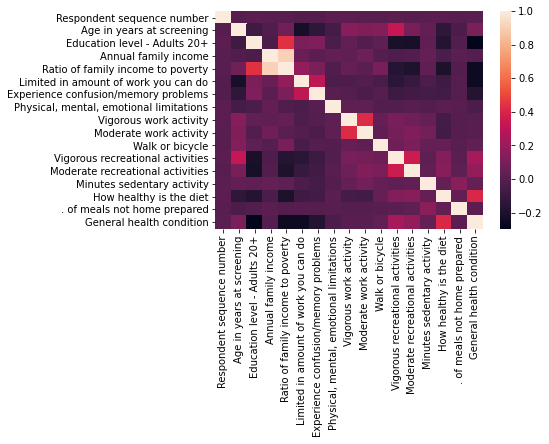

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corrMatrix, annot=False)
plt.show()

Macierz korelacji w formie heatmapy wygląda zdecydowanie lepiej. Widoczne są jasne pola przy zmiennych "Annual family income" i "Ratio of family income to poverty" dlatego warto sprawdzić dokładnie ile wynosi korelacja między tymi zmiennymi.

In [40]:
df_model["Ratio of family income to poverty"].corr(df_model["Annual family income"])

0.9108635365411755

Zmienne te są ze sobą skorelowane w bardzo wysokim stopniu. W rzeczywistości ubóstwo rodziny jest w największym stopniu zależne od jej dochodu dlatego należy usunąć zmienną Ratio of family income to poverty, ponieważ zmienna "Annual family income" będzie zmienną zależną w modelu, a połączenie tych 2 zmiennych w jednym modelu nie wpływałoby korzystnie na oszacowania modelu.

In [41]:
df_model = df_model.drop("Ratio of family income to poverty", axis=1)
df_model

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
0,93705,66,2.0,3.0,2.0,2.0,2.0,2,2,2,2,1,300.0,3.0,5.0,3.0
1,93706,18,NaN,NaN,NaN,NaN,NaN,2,2,1,2,1,240.0,2.0,6.0,2.0
2,93708,66,1.0,6.0,1.0,1.0,NaN,2,2,2,2,1,120.0,1.0,2.0,3.0
3,93709,75,4.0,2.0,1.0,2.0,NaN,2,1,2,2,2,600.0,3.0,0.0,NaN
4,93711,56,5.0,15.0,2.0,2.0,2.0,2,2,1,1,1,420.0,2.0,4.0,2.0
5,93712,18,NaN,4.0,NaN,NaN,NaN,1,1,2,1,1,120.0,4.0,12.0,3.0
6,93713,67,3.0,6.0,2.0,1.0,NaN,2,2,1,2,1,120.0,4.0,0.0,2.0
7,93714,54,4.0,7.0,2.0,2.0,2.0,2,2,2,2,2,360.0,4.0,5.0,3.0
8,93715,71,3.0,8.0,1.0,1.0,NaN,1,1,1,1,2,180.0,5.0,1.0,4.0
9,93716,61,5.0,15.0,2.0,2.0,2.0,2,2,2,1,1,300.0,1.0,0.0,2.0


Ponownie przyglądam się opisowi statystyk, a w szczególności wartościom maksymalnym i 3 kwartylom, ponieważ znaczna różnica między tymi statystykami może oznaczać nietypową odpowiedź, która zazwyczaj jest zaznaczona liczbami 9; 99; 999 itp.

In [42]:
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5533.000000,5533.000000,5265.000000,5267.000000,5265.000000,5265.000000,3644.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5523.000000,5533.000000,5533.000000,5137.000000
mean,98275.674679,49.816555,3.526686,12.313271,1.751567,1.911301,1.964325,1.768119,1.588108,1.754202,1.755467,1.603832,387.452471,3.056208,23.139888,2.861982
std,2685.591411,18.649364,1.238818,17.578693,0.531502,0.366112,0.206511,0.488756,0.541198,0.430598,0.429849,0.489144,760.361560,1.021773,421.093613,0.970069
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95945.000000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98257.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100590.000000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,9.000000,99.000000,9.000000,9.000000,7.000000,9.000000,9.000000,2.000000,2.000000,2.000000,9999.000000,9.000000,9999.000000,9.000000


Poza weryfikacją wartości na podstawie statystyk, sprawdziłem dokładne opisy zmiennych oraz ich wartości w dokumentacji aby poprawnie określić czy wartości maksymalne w niektórych zmiennych jakościowych są niepożądane. Z dokumentacji wynika, że w wielu zmiennych maksimum oznacza odpowiedź "Nie wiem", a takie obserwacje nie są pożądane.

In [43]:
df_model_col=df_model.columns.to_list()
col_to_take=list(range(2, 9))+list(range(12, 16))
dont_know_col= [df_model_col[i] for i in col_to_take]

df_model_max=df_model.max()
dont_know_col_max= [df_model_max[i] for i in col_to_take]

dont_know_col_dictionary = dict(zip(dont_know_col, dont_know_col_max))
dont_know_col_dictionary

{'Education level - Adults 20+': 9.0,
 'Annual family income': 99.0,
 'Limited in amount of work you can do': 9.0,
 'Experience confusion/memory problems': 9.0,
 'Physical, mental, emotional limitations': 7.0,
 'Vigorous work activity': 9.0,
 'Moderate work activity': 9.0,
 'Minutes sedentary activity': 9999.0,
 'How healthy is the diet': 9.0,
 '. of meals not home prepared': 9999.0,
 'General health condition': 9.0}

In [44]:
for i in range(0,len(dont_know_col_max)):
    j=col_to_take[i]
    indexNames = df_model[ df_model.iloc[:,j]== dont_know_col_max[i]].index
    df_model.drop(indexNames , inplace=True)

In [45]:
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5343.000000,5343.000000,5081.000000,5089.000000,5081.000000,5081.000000,3524.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5333.000000,5343.000000,5343.000000,4974.000000
mean,98269.028074,49.828748,3.546546,10.153272,1.740012,1.907302,1.962826,1.759124,1.578140,1.754071,1.753696,1.600786,333.510594,3.046977,8.891447,2.848211
std,2689.269141,18.647965,1.200331,11.168401,0.438671,0.290038,0.189214,0.427655,0.493903,0.430677,0.430898,0.489783,198.657212,1.018291,185.403571,0.962226
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95916.000000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98243.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100593.000000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,7.000000,77.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1320.000000,5.000000,7777.000000,5.000000


Przy użyciu pętli usunąłem obserwacje dla których w jakościowych kolumnach występowały wartości oznaczające odpowiedź "Nie wiem". Takich obserwacji było niewiele, zbiór zmniejszył się z 5533 do 5343 wierszy.

Poza odpowiedziami "Nie wiem" niepożądane są także przypadki, w których ankietowany odmówił odpowiedzi. Podobnie jak w przypadku odpowiedzi "Nie wiem" są to wartości liczbowe, które różnią się znacznie od pozostałych w zbiorze. W najnowszym zbiorze będą to wartości maksymalne, ponieważ schemat w dokumentacji prezentujący opis poszczególnych liczb w kolumnach jest następujący (zaczynając od liczby 0):

- różne odpowiedzi anketowanych (inne niż "nie wiem"); 
- odmowa odpowiedzi; 
- odpowiedź "nie wiem".

Należy ponownie sprecyzować kolumny, które mają zostać przeszukane pod kątem wartości maksymalnej, ponieważ w niektórych przypadkach nikt nie odmówił odpowiedzi i brakuje takiej wartości zmiennej, a więc nie można wykorzystać kolumn wybranych w poprzednim kroku.

In [46]:
df_model_col=df_model.columns.to_list()
col_to_take=[2,3,14]
refused_col= [df_model_col[i] for i in col_to_take]

df_model_max=df_model.max()
refused_col_max= [df_model_max[i] for i in col_to_take]

print(dict(zip(refused_col, refused_col_max)))

{'Education level - Adults 20+': 7.0, 'Annual family income': 77.0, '. of meals not home prepared': 7777.0}


In [47]:
for i in range(0,len(refused_col_max)):
    j=col_to_take[i]
    indexNames = df_model[ df_model.iloc[:,j]== refused_col_max[i]].index
    df_model.drop(indexNames , inplace=True)

df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5224.000000,5224.000000,4968.000000,4970.000000,4968.000000,4968.000000,3460.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5214.000000,5224.000000,5224.000000,4877.000000
mean,98265.563553,49.772588,3.552536,8.581087,1.742955,1.907810,1.962428,1.758806,1.574655,1.755743,1.751914,1.599541,333.993479,3.051302,7.545750,2.843756
std,2692.572323,18.630952,1.194434,4.475146,0.437048,0.289323,0.190187,0.427849,0.494442,0.429687,0.431943,0.490038,199.200825,1.017956,153.627102,0.962477
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95909.500000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98233.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100594.750000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,5.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1320.000000,5.000000,5555.000000,5.000000


Jeszcze jedna kolumna zawiera wartość maksymalną która nie pasuje do zbioru. Jest to zmienna ". of meals not home prepared". Liczba 5555 oznacza więcej niz 21 posiłków w tygodniu. W dokumentacji jest to jedynie 5 spośród 8838 obserwacji, a w zbiorze df_model po uwzględnieniu wartosci NULL w innych kolumnach to będzie to znikoma wartość, ale mimo to nie może pozostać w aktualnej postaci. Postanowiłem zamienić tę wartość na 22, ponieważ w regresji będzie to zgodne z pozostałymi wartościami tej zmiennej.

In [48]:
df_model['. of meals not home prepared'] = df['. of meals not home prepared'].replace(5555,22)
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5224.000000,5224.000000,4968.000000,4970.000000,4968.000000,4968.000000,3460.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5214.000000,5224.000000,5224.000000,4877.000000
mean,98265.563553,49.772588,3.552536,8.581087,1.742955,1.907810,1.962428,1.758806,1.574655,1.755743,1.751914,1.599541,333.993479,3.051302,3.309150,2.843756
std,2692.572323,18.630952,1.194434,4.475146,0.437048,0.289323,0.190187,0.427849,0.494442,0.429687,0.431943,0.490038,199.200825,1.017956,3.903776,0.962477
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95909.500000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98233.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100594.750000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,5.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1320.000000,5.000000,22.000000,5.000000


Zmienna "Minutes sedentary activity" jest zmienną ciągłą. Nie jestem pewien czy będzie ona pasowała do pozostałych zmiennych, dlatego utworzę zmienną jakościową na podstawie tej zmiennej, ale bez usuwania oryginalnej zmiennej, ponieważ w trakcie budowy modelu sprawdzę która z nich będzie lepiej pasować do analizowanego zjawiska. W celu poprawniejszego utworzenia przedziałów wyświetlę histogram tej zmiennej.

D:\Programy\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minutes sedentary activity'>

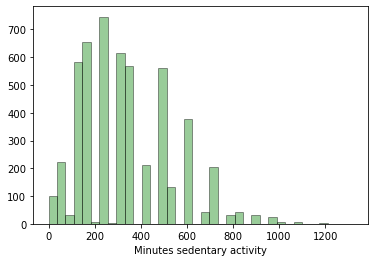

In [49]:
sns.distplot(df_model['Minutes sedentary activity'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})

Sprawdzę jeszcze dokładne wartości poszczególnych percentyli.

In [50]:
for i in range(10,91,10):
    print('Wartość', i ,'percentyla to:',np.nanpercentile(df_model['Minutes sedentary activity'], i))

Wartość 10 percentyla to: 120.0
Wartość 20 percentyla to: 180.0
Wartość 30 percentyla to: 180.0
Wartość 40 percentyla to: 240.0
Wartość 50 percentyla to: 300.0
Wartość 60 percentyla to: 360.0
Wartość 70 percentyla to: 420.0
Wartość 80 percentyla to: 480.0
Wartość 90 percentyla to: 600.0


In [51]:
pd.options.mode.chained_assignment = None 
df_model['Sedentary activity'] = pd.cut(df_model['Minutes sedentary activity'], bins=[-0.01, 100, 200, 300, 400, 500, 600, 1400], labels=[1, 2, 3,4,5,6,7])

In [52]:
df_model

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition,Sedentary activity
0,93705,66,2.0,3.0,2.0,2.0,2.0,2,2,2,2,1,300.0,3.0,5.0,3.0,3
1,93706,18,NaN,NaN,NaN,NaN,NaN,2,2,1,2,1,240.0,2.0,6.0,2.0,3
2,93708,66,1.0,6.0,1.0,1.0,NaN,2,2,2,2,1,120.0,1.0,2.0,3.0,2
3,93709,75,4.0,2.0,1.0,2.0,NaN,2,1,2,2,2,600.0,3.0,0.0,NaN,6
4,93711,56,5.0,15.0,2.0,2.0,2.0,2,2,1,1,1,420.0,2.0,4.0,2.0,5
5,93712,18,NaN,4.0,NaN,NaN,NaN,1,1,2,1,1,120.0,4.0,12.0,3.0,2
6,93713,67,3.0,6.0,2.0,1.0,NaN,2,2,1,2,1,120.0,4.0,0.0,2.0,2
7,93714,54,4.0,7.0,2.0,2.0,2.0,2,2,2,2,2,360.0,4.0,5.0,3.0,4
8,93715,71,3.0,8.0,1.0,1.0,NaN,1,1,1,1,2,180.0,5.0,1.0,4.0,2
9,93716,61,5.0,15.0,2.0,2.0,2.0,2,2,2,1,1,300.0,1.0,0.0,2.0,3


In [53]:
df_model['Sedentary activity'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7], ordered=True)

In [54]:
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition
count,5224.000000,5224.000000,4968.000000,4970.000000,4968.000000,4968.000000,3460.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5214.000000,5224.000000,5224.000000,4877.000000
mean,98265.563553,49.772588,3.552536,8.581087,1.742955,1.907810,1.962428,1.758806,1.574655,1.755743,1.751914,1.599541,333.993479,3.051302,3.309150,2.843756
std,2692.572323,18.630952,1.194434,4.475146,0.437048,0.289323,0.190187,0.427849,0.494442,0.429687,0.431943,0.490038,199.200825,1.017956,3.903776,0.962477
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,95909.500000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000
50%,98233.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000
75%,100594.750000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000
max,102956.000000,80.000000,5.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1320.000000,5.000000,22.000000,5.000000


In [55]:
df_model['Sedentary activity']=pd.to_numeric(df_model['Sedentary activity'], downcast='float')
print(df_model.dtypes)

Respondent sequence number                   int64
Age in years at screening                    int64
Education level - Adults 20+               float64
Annual family income                       float64
Limited in amount of work you can do       float64
Experience confusion/memory problems       float64
Physical, mental, emotional limitations    float64
Vigorous work activity                       int64
Moderate work activity                       int64
Walk or bicycle                              int64
Vigorous recreational activities             int64
Moderate recreational activities             int64
Minutes sedentary activity                 float64
How healthy is the diet                    float64
. of meals not home prepared               float64
General health condition                   float64
Sedentary activity                         float32
dtype: object


In [56]:
df_model['Sedentary activity'].isnull().sum() == df_model['Minutes sedentary activity'].isnull().sum() 

True

In [57]:
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition,Sedentary activity
count,5224.000000,5224.000000,4968.000000,4970.000000,4968.000000,4968.000000,3460.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5214.000000,5224.000000,5224.000000,4877.000000,5214.000000
mean,98265.563553,49.772588,3.552536,8.581087,1.742955,1.907810,1.962428,1.758806,1.574655,1.755743,1.751914,1.599541,333.993479,3.051302,3.309150,2.843756,3.630610
std,2692.572323,18.630952,1.194434,4.475146,0.437048,0.289323,0.190187,0.427849,0.494442,0.429687,0.431943,0.490038,199.200825,1.017956,3.903776,0.962477,1.706576
min,93705.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,95909.500000,33.000000,3.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,180.000000,2.000000,1.000000,2.000000,2.000000
50%,98233.000000,51.000000,4.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000,3.000000
75%,100594.750000,65.000000,4.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,4.000000,3.000000,5.000000
max,102956.000000,80.000000,5.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1320.000000,5.000000,22.000000,5.000000,7.000000


Dodana została nowa zmienna jakościowa o nazwie "Sedentary activity", która zawiera 7 przedziałów. Zmienna jest widoczna podczas wyświetlania zbioru, ale nie jest widoczna podczas wyświetlania statystyk, ponieważ po dodaniu jej do zbioru ma ona typ categorical, dlatego należy ją zamienić na typ liczbowy. Po tej zmianie sprawdziłem czy statystyki tej zmiennej są sensowne i zgodne z tym co chciałem uzyskać. Aby zweryfikować czy poprawnie przypisałem liczby ograniczające przedziały, sprawdziłem czy liczba wartości pustych w nowej zmiennej jest równa liczbie wartości pustych w zmiennej, z której została utworzona. W przypadku gdyby liczba nie zawierała się w przedziale to wtedy w zmiennej "Sedentary activity" byłaby wartość NULL i liczba NULLi w tej kolumnie nie zgadzałaby się z liczbą NULLi w kolumnie "Minutes sedentary activity". Występowanie NULLi można sprawdzić także w tabeli ze statystykami, ponieważ wartości NULL nie są liczone, co sprawia że gdyby występowała wartość NULL to byłoby to widocznie w liczbie obserwacji, więc po usunięciu wszystkich NULLi można łatwo zweryfikować czy zmienna została poprawnie utworzona.

Usuwanie obserwacji w celu wyczyszczenia zbioru w pełni z brakujących wartości nie jest konieczne, ponieważ podczas wykonywania modelu zazwyczaj automatycznie są omijane obserwacje z NULLami, ale w tym przypadku zależy mi na tym aby sprawdzić czy powinienem usunąć obserwacje, dla których wiek jest mniejszy niż 20. Wynika to z kolumny "Education level - Adults 20+". Dodatkowo nie jestem pewien jaki model wykorzystam, więc bezpieczniej będzie usunąć NULLe.

In [58]:
df_model = df_model.dropna(how='any',axis=0) 
df_model.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition,Sedentary activity
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.0,3103.0,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,98265.174347,47.797937,3.708991,9.395746,2.0,2.0,1.958750,1.738318,1.559136,1.754431,1.705769,1.551724,323.956816,2.995811,3.498872,2.653561,3.550113
std,2708.193376,17.179470,1.152775,4.380074,0.0,0.0,0.198901,0.439621,0.496571,0.430493,0.455770,0.497398,193.490048,1.002728,3.925390,0.896044,1.689661
min,93705.000000,20.000000,1.000000,1.000000,2.0,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,95880.500000,33.000000,3.000000,6.000000,2.0,2.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,180.000000,2.000000,1.000000,2.000000,2.000000
50%,98256.000000,47.000000,4.000000,9.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000,3.000000
75%,100624.500000,62.000000,5.000000,14.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,5.000000,3.000000,5.000000
max,102953.000000,80.000000,5.000000,15.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1200.000000,5.000000,21.000000,5.000000,7.000000


In [66]:
df_model_2 = df_model[df_model['Annual family income'] != 12]
df_model_2 = df_model[df_model['Annual family income'] != 13]

In [69]:
df_model_2['Annual family income'] = df_model_2['Annual family income'].replace([14,15],[12,13])
df_model_2.describe()

,Respondent sequence number,Age in years at screening,Education level - Adults 20+,Annual family income,Limited in amount of work you can do,Experience confusion/memory problems,"Physical, mental, emotional limitations",Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activities,Moderate recreational activities,Minutes sedentary activity,How healthy is the diet,. of meals not home prepared,General health condition,Sedentary activity
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.0,3070.0,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000
mean,98267.698046,47.813681,3.714658,8.671661,2.0,2.0,1.958632,1.738111,1.557980,1.757655,1.706189,1.550814,324.999349,2.994788,3.497720,2.651466,3.560261
std,2708.419219,17.178489,1.151315,3.586979,0.0,0.0,0.199172,0.439734,0.496708,0.428572,0.455581,0.497492,193.438358,1.002752,3.916008,0.896586,1.687400
min,93705.000000,20.000000,1.000000,1.000000,2.0,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,95881.250000,33.000000,3.000000,6.000000,2.0,2.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,180.000000,2.000000,1.000000,2.000000,2.000000
50%,98260.000000,47.000000,4.000000,8.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000,3.000000,2.000000,3.000000,3.000000
75%,100623.750000,62.000000,5.000000,12.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,480.000000,4.000000,5.000000,3.000000,5.000000
max,102953.000000,80.000000,5.000000,13.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1200.000000,5.000000,21.000000,5.000000,7.000000


In [70]:
df_model_2.to_csv("healthy_style.csv")

Tak prezentują się statystyki ostatecznego zbioru po usunięciu pustych wartości w kazdej kolumnie. Zbiór składa się z 3103 obserwacji dla osób w wieku od 20 lat. Usuwanie NULLi na samym końcu może nie być najlepszą praktyką, ponieważ usunięcie NULLi na początku działań może ograniczyć naszą pracę. W tym przypadku w kolumnie ". of meals not home prepared" maksiumum to 21, co oznacza, że obserwacje posiadające wartość 22 zostały usunięte ze zbioru, a moje działania związane z zamianą wartości 5555 na 22 na pierwszy rzut oka są zbędne, ale należy wziąć pod uwagę, że nie jestem pewien czy wszystkie kolumny wykorzystam w modelu. Gdyby tak nie nastąpiło, to usunięcie wartości pustych na początku ograniczyłoby ten zbiór w większym stopniu, ponieważ usunięte zostałyby obserwacje, dla których występowałyby puste wartości w kolumnie, która nie została wykorzystana w modelu. Gdy usuwam NULLe na końcu działań to wystarczy, że dodam usunięcie tej kolumny przed usunięciem wszystkich NULLi a wtedy nie muszę poprawiać wielu linijek kodu a mogę zyskać próbę o wiekszej liczbie obserwacji.

## Podsumowanie

W projekcie został przedstawiony proces przygotowania danych w celu wykorzystania ich w modelowaniu. W pierwszej części pracy opisane zostały działania mające na celu dobór odpowiednich zmiennych a następnie utworzenie jednego zbioru z wielu wykorzystywanych podczas selekcji zmiennych. Następnie w drugiej części pracy przedstawione zostały działania krok po kroku, których celem było uzyskanie zbioru z możliwie największą liczbą obserwacji, a jednoczeście z najbardziej poprawnymi wartościami. Czynności te pozwoliły na uzyskanie zbioru z 3103 obserwacjami, który będzie stanowił próbę dla modelu, w którym badany będzie wpływ trybu życia na zarobki, a szczególny nacisk będzie położony na zbadanie czy zdrowy tryb życia ma wpływ na zarobki. Prawdopodobnie w tym celu zostanie wykorzystana wielomianowa regresja logistyczna, ponieważ zmienna zależna jest zmienną jakościową, a więc metody poznane na kursie ekonometrii na studiach licencjackich nie będą dobrym wyborem.